In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install urllib3 --upgrade 
%pip install requests --upgrade 
%pip install spotipy --upgrade

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# setup
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
import numpy as np
import timeit
import pandas as pd
from operator import itemgetter
import time
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.spatial.distance as dist
import random

os.environ['SPOTIPY_CLIENT_ID'] = '3191e7e8b04e46c1af64f49bcdd020be'
os.environ['SPOTIPY_CLIENT_SECRET'] = '88dc925eff0d4006bb6d0b9b2401ac59'

auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
# Toxic, Promiscuous, Sk8er Boi, Run It!, Your Love Is My Drug
user_0 = ['6I9VzXrHxO9rA9A5euc8Ak', '2gam98EZKrF9XuOkU13ApN', '4omisSlTk6Dsq2iQD7MA07', '7xYnUQigPoIDAMPVK79NEq', '3uoQULcUWfnt6nc6J7Vgai']

# This Hell
user_1 = ['7aHmvUghK3XCEqNRbUeAn4']

# Down (Jay Sean), INDUSTRY BABY
user_2 = ['7LP4Es66zdY7CyjepqmvAg', '27NovPIUIRrOZoCHxABJwK']

# Pepas, Me Porto Bonito, Tití Me Preguntó
user_3 = ['5fwSHlTEWpluwOM0Sxnh5k', '6Sq7ltF9Qa7SNFBsV5Cogx', '1IHWl5LamUGEuP4ozKQSXZ']

# All Night Longer, Mr. Brightside, No Hands, HUMBLE
user_4 = ['1vNn7rVQT6UtEW1NGH53fT', '003vvx7Niy0yvhvHt4a68B', '03tqyYWC9Um2ZqU0ZN849H', '7KXjTSCq5nL1LoYtL7XAwS']

# S&M, Get Into It (Yuh), Only Girl In The World, Gimme Gimme Gimme, Don't Start Now
user_5 = ['7ySUcLPVX7KudhnmNcgY2D', '4V5siYO9zHpLX5qf2F0qBV', '1VDXQhu7YGdbM6UeEIfsaX', '7lkeI7MsLOZ5gyh9ejaf3W', '6WrI0LAC5M1Rw2MnX2ZvEg']

# In The Party (Flo Milli), Tap In (Saweetie), Woman (Doja Cat), Only, Hot Girl (Megan Thee Stallion)
user_6 = ['52BJrldggFQyTiW8XrILhO', '4Hpib09wXgD84w4uwTPnYD', '6Uj1ctrBOjOas8xZXGqKk4', '4MRT0dDbhqFKl67WzhUbSw', '2Xc9MR2NMc5IKPFKaEjt1k']

# Love Story, You Belong With Me, Starships, Super Bass, Since U Been Gone
user_7 = ['3CeCwYWvdfXbZLXFhBrbnf', '1qrpoAMXodY6895hGKoUpA', '1oHNvJVbFkexQc0BpQp7Y4', '3hlksXnvbKogFdPbpO9vel', '3xrn9i8zhNZsTtcoWgQEAd']

# A Milli, 6 Foot 7 Foot, Money In The Grave, Jimmy Cooks
user_8 = ['6ScJMrlpiLfZUGtWp4QIVt', '5Qy6a5KzM4XlRxsNcGYhgH', '5ry2OE6R2zPQFDO85XkgRb', '3F5CgOj3wFlRv51JsHbxhe']

# BREAK MY SOUL, PURE/HONEY, ALIEN SUPERSTAR
user_9 = ['5pyoxDZ1PX0KxBxiRVxA4U', '4DByEumlGTZKSzuVEZ35eo', '1Hohk6AufHZOrrhMXZppax']

# The Baddest, Let's Get Weird, Astro Funk, Griztronics II, Tie Dye Sky
user_10 = ['2xOrdBxmf58MfWbe3JXxlM', '0NQVIXbk5AIHzNrBdlcTP9', '7wRzUAw0Npu4CalkDIFHJE', '2il9NDpW87Hk2L9AjeDf8r', '2YZSTgWXEyDPUeKop4eiWo']

# Mozart
user_11 = ['429GaRIWKJ3EU1GAQPbLcr']

# Can't Hold Us, Feel This Moment, Give Me Everything
user_12 = ['3bidbhpOYeV4knp8AIu8Xn', '0Hf4aIJpsN4Os2f0y0VqWl', '4QNpBfC0zvjKqPJcyqBy9W']

# Timber, Last Friday Night
user_13 = ['3cHyrEgdyYRjgJKSOiOtcS', '3avYqdwHKEq8beXbeWCKqJ']

# DJ Got Us Fallin In Love, Down Jay Sean, I Love It, Timber
user_14 = ['28AUzRo0nQLESL55WDV0um', '7LP4Es66zdY7CyjepqmvAg', '6HZ9VeI5IRFCNQLXhpF4bq', '3cHyrEgdyYRjgJKSOiOtcS']

users = [user_0, user_1, user_2, user_3, user_4, user_5, user_6, user_7, user_8, user_9, user_10, user_11, user_12, user_13, user_14]

In [6]:
def print_tracks(uris):
    #recurse through all uris
    if len(uris) > 50:
        num_sets = int(len(uris)/50)
        for i in range(num_sets):
            print_tracks(uris[50*i:50*(i+1)])
        if len(uris)%50 != 0:
            print_tracks(uris[50*num_sets:])
        return

    # collect chosen tracks
    chosen_tracks = sp.tracks(uris)
    chosen_tracks_dict = pd.DataFrame(chosen_tracks['tracks'])
    chosen_tracks_names = chosen_tracks_dict['name']
    chosen_artists_dict = chosen_tracks_dict['artists']
    chosen_artists = []
    for song in chosen_artists_dict:
        a = []
        for artist in song:
            a.append(artist['name'])
        chosen_artists.append(a)

    # print chosen tracks
    for i in range(len(chosen_tracks_names)):
        chosen_artists_string = ''
        for j in range(len(chosen_artists[i])):
            # print(artist)
            chosen_artists_string += chosen_artists[i][j]
            if j < len(chosen_artists[i])-1:
                chosen_artists_string += ', '
        print(chosen_tracks_names[i] + ' by ' + chosen_artists_string)

In [7]:
# Scale features to range of [-1,1]
def scale_features(features, cols):
    scaler = StandardScaler()
    scaler.fit(features)
    scaled_features = pd.DataFrame(scaler.transform(features))
    scaled_features.columns = cols
    return scaled_features, scaler

In [8]:
NUM_RECOMMENDATIONS = 100
def get_recommendations(uris):
    recommendations_uris = pd.DataFrame(sp.recommendations(seed_tracks=uris, limit=NUM_RECOMMENDATIONS)['tracks'])['uri']
    return sp.audio_features(recommendations_uris)

In [9]:
MS_IN_DAY = 86400
# get artist, artist genres, popularity, date
def get_track_values(uris):
    # return values are messed up - gotta pass through the return values!!
    extra_uris = []
    if len(uris) > 50:
        extra_uris = uris[50:]
        uris = uris[:50]

    # collect chosen tracks
    tracks = sp.tracks(uris)
    tracks_dict = pd.DataFrame(tracks['tracks'])

    popularity = list(tracks_dict['popularity'])
    names = list(tracks_dict['name'])

    artists_dict = tracks_dict['artists']
    artists = []
    for song in artists_dict:
        a = []
        for artist in song:
            a.append(artist['name'])
        artists.append(a)

    # get genres
    # flatten artists list, make sure len < 50, get genres - prob separate method

    albums_dict = pd.DataFrame(tracks_dict['album'].to_list())
    unconverted_dates = albums_dict['release_date']
    dates = []
    # datetime conversion
    for date in unconverted_dates:
        while len(date) < 10:
            date += '-01'
        ms_date = dt.datetime.timestamp(dt.datetime.strptime(date,"%Y-%m-%d"))
        dates.append(ms_date / MS_IN_DAY)
    
    track_values = [artists, popularity, dates, names]
    
    if len(extra_uris) > 0:
        recur_values = get_track_values(extra_uris)
        for i in range(len(track_values)):
            track_values[i].extend(recur_values[i])
    return track_values

In [10]:
CHOSEN_FEATURES_WEIGHT = 100
# function to get audio features, gkde, and scaler from a set of 1-5 URIs
def get_values(uris, print_songs = False):
    assert(len(uris) <= 5)

    # Get audio features for user's chosen tracks from Spotify API
    chosen_features = sp.audio_features(uris)
    
    if print_songs:
        print('Chosen Tracks:')
        print_tracks(uris)
        print()

    # Get audio features for user's recommended tracks from Spotify API
    recommendations_features = get_recommendations(uris)
    if print_songs:
        print('Recommended Tracks: ')
        print_tracks(pd.DataFrame(recommendations_features)['uri'])
        print()
    
    # Create unweighted list of all features
    unweighted_features = pd.DataFrame(chosen_features + recommendations_features)
    unweighted_features = unweighted_features.drop(['key', 'loudness', 'mode', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)

    # Create weighted list of all features favoring chosen features
    weighted_features = pd.DataFrame(chosen_features * CHOSEN_FEATURES_WEIGHT + recommendations_features)
    weighted_features = weighted_features.drop(['key', 'loudness', 'mode', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)

    recommendations_uris = pd.DataFrame(recommendations_features)['uri']

    return unweighted_features, weighted_features, recommendations_uris
    # return unweighted_features, unweighted_scaler, weighted_features, weighted_scaler, recommendations_uris

In [11]:
ARTIST_PENALTY = 0.05
# evaluate using cosine distance
def evaluate(uri, user_avg, eval_artists, scale_mean, scale_var):
    # get audio features
    features = pd.DataFrame(sp.audio_features(uri))
    features = features.drop(['key', 'loudness', 'mode', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'], axis=1)
    artists, popularity, dates, _ = get_track_values([uri])
    features['popularity'] = popularity
    features['date'] = dates
    artists = artists[0]

    # scale the features array
    features = (features - scale_mean) / np.sqrt(scale_var)

    penalty = 1
    artist_included = any(a in eval_artists for a in artists)
    if not artist_included:
        penalty += ARTIST_PENALTY
        # print('Penalized')
    
    return dist.cosine(features, user_avg) * ARTIST_PENALTY

In [12]:
def get_features(uris):
    n = len(uris)
    uf, wf, rec_uris = get_values(uris)
    artists, popularity, dates, names = get_track_values(uris + list(rec_uris))
    # rec_uris_list = rec_uris_list.append(rec_uris)

    # add to uf
    uf['popularity'] = popularity
    uf['date'] = dates

    # add to wf in a weighted way
    wf['popularity'] = (popularity[:n] * CHOSEN_FEATURES_WEIGHT) + popularity[n:]
    wf['date'] = (dates[:n] * CHOSEN_FEATURES_WEIGHT) + dates[n:]
    
    return uf, wf, rec_uris, artists, names

In [13]:
# set up utility function for each user
# take the average over all user's features then calculate distance to that
# get all features, scale, take average
def get_utilfuncs_and_allsongs(users_uris):
    all_unweighted_features = pd.DataFrame()
    all_weighted_features = pd.DataFrame()

    n = len(users_uris)

    all_uris_list = []
    artists_list = []
    names_list = []

    for i in range(n):
        uf, wf, rec_uris, artists, names = get_features(users[i])

        all_unweighted_features = pd.concat([all_unweighted_features, uf])
        all_weighted_features = pd.concat([all_weighted_features, wf])
        all_uris_list.extend(users[i])
        all_uris_list.extend(rec_uris)
        artists_list.append(artists)
        names_list.append(names[:len(users_uris[i])])

    # display(all_unweighted_features.iloc[[1,2,3]])
    # get scalers - can make this more efficient by just scaling everything in the scale_features function
    all_unweighted_features, _ = scale_features(all_unweighted_features, all_unweighted_features.columns) 
    # _, weighted_scaler = scale_features(all_weighted_features) # unweighted or weighted?
    # u_mean, u_var = unweighted_scaler.mean_, unweighted_scaler.var_
    # display(all_unweighted_features.iloc[[1,2,3]])

    u_start_index = 0
    w_start_index = 0

    u_user_avgs = []
    w_user_avgs = []

    for i in range(n):
        # get user's features
        u_end_index = u_start_index + NUM_RECOMMENDATIONS + len(users_uris[i])
        w_end_index = w_start_index + NUM_RECOMMENDATIONS + (len(users_uris[i] * CHOSEN_FEATURES_WEIGHT))

        uf = all_unweighted_features.iloc[u_start_index:u_end_index]
        wf = all_weighted_features.iloc[w_start_index:w_end_index]

        # scale features
        # uf = (uf - u_mean) / np.sqrt(u_var)
        # wf = (wf - u_mean) / np.sqrt(u_var)
        
        u_start_index = u_end_index
        w_start_index = w_end_index

        # take the average of uf and wf, add to array of average vectors
        u_user_avgs.append(np.mean(uf, axis=0))
        w_user_avgs.append(np.mean(wf, axis=0))

    # all_unweighted_features['uri'] = all_uris_list
    
    return u_user_avgs, w_user_avgs, all_unweighted_features, np.array(all_uris_list)

In [14]:
# NEW VERSION: calculate the distance from every average to every song
def calculate_distances(avgs, songs):
    # print(avgs)
    # print(songs)
    dists = pd.DataFrame()
    for i in range(len(avgs)):
        user_dists = []
        # print('min dist for user ', i)
        for j, song in songs.iterrows():
            # print(avgs[i])
            # print(song)
            d = dist.cosine(avgs[i], song)
            # print('dist =', d)
            user_dists.append(d)
        dists[i] = user_dists
    return dists

In [15]:
# sigmoid function with beta parameter weighting
# it might be descending too quickly
def sigmoid(x, beta):
    # s = 1 / (1 + np.exp(-x))
    # print(x*beta)
    x = max(x*beta, -709)
    s = 1 / (1 + np.exp(-x))
    # print(s)
    return s

In [16]:
# standardize to range of 0,1, then sort, then binary search as needed
def sort_by_energy(features, uris, energy_curve):
    sorted_features = features.sort_values(by='energy')
    sorted_features['uri'] = uris

    songs_per_iter = int(len(uris) / len(energy_curve))
    remainder = len(uris) % len(energy_curve)

    argsort_energy = np.argsort(energy_curve)
    print(energy_curve)
    print(argsort_energy)

    chosen_ordered_features = pd.DataFrame()
    argsort_dict = {}

    len_energy = len(energy_curve)

    for i in range(len_energy):
        start = i * songs_per_iter
        end = start + songs_per_iter
        if i == len_energy-1:
            end += remainder
        argsort_dict[argsort_energy[i]] = sorted_features.iloc[start:end]

    for i in range(len_energy):
        chosen_ordered_features = pd.concat([chosen_ordered_features, argsort_dict[i]])
    
    return chosen_ordered_features

In [19]:
# SORT! min dist indices
# currently using weighted as default
def select_songs_sort(users_uris, energy_curve, weighted=True):
    u_user_avgs, w_user_avgs, all_features, all_uris_list = get_utilfuncs_and_allsongs(users_uris)
    all_features = all_features.drop_duplicates()
    all_uris_list = np.array(list(dict.fromkeys(all_uris_list)))

    if weighted:
        avgs = w_user_avgs
    else:
        avgs = u_user_avgs

    all_dists = calculate_distances(avgs, all_features)
    indices_sorted_by_min_dist = np.argsort(all_dists, axis=0)
    # use these sorted indices to choose songs (both add and remove)
    # use all_dists to sum distances so i don't have to recalculate them

    n = len(all_features)
    # needs to adjust dynamically to length
    # NUM_SONGS_TO_SELECT = 10

    # start with random set of songs - selected array is indices of selected songs
    selected_ind = random.sample(range(n), NUM_SONGS_TO_SELECT) #TODO: choose each user's favorite song(s)

    # loop until done
    done = False
    t = 0
    selected_changed = True
    new_song_ind = 0

    while not done:
        # print('t =', t)
        # calculate sum of user utilities for every song in the set
        if selected_changed:
            # for every user, their current dist is the sum of all_dists[user][selected_ind]
            current_selected_song_dists = all_dists.iloc[selected_ind]
            current_user_dist_sums = np.sum(current_selected_song_dists, axis=0)
            current_maximin = max(current_user_dist_sums)
            # print('current maximin =', current_maximin)
            current_maximin_user = np.argmax(current_user_dist_sums)
            selected_changed = False
        
        # print('current max dist user:', current_maximin_user)
        
        if new_song_ind == n:
            print('sort solved')
            break
        while indices_sorted_by_min_dist[current_maximin_user].iloc[new_song_ind] in selected_ind and new_song_ind < n-1:
            new_song_ind += 1
        new_selected_song = indices_sorted_by_min_dist[current_maximin_user].iloc[new_song_ind]

        # pick removed song: loop through all selected songs, try removing all until one improves the set
        for i in range(NUM_SONGS_TO_SELECT):
            removed_selected = i

            # update new selected indices
            new_selected_ind = selected_ind.copy()
            new_selected_ind[removed_selected] = new_selected_song

            # recalculate sum of user utilities
            new_selected_song_dists = all_dists.iloc[new_selected_ind]
            new_user_dist_sums = np.sum(new_selected_song_dists, axis=0)
            new_maximin = max(new_user_dist_sums)
            new_maximin_user = np.argmax(new_user_dist_sums)
            # print(new_dists)

            # determine whether to edit selected_ind list
            if new_maximin < current_maximin:
                # print('edited')
                # print(selected_ind)
                selected_ind[removed_selected] = new_selected_song
                # print(selected_ind)
                selected_changed = True
                # print('new max dist user:', new_maximin_user)
                new_song_ind = 0
                break
            elif random.random() < sigmoid(current_maximin-new_maximin, t):
                # print('randomly edited')
                selected_ind[removed_selected] = new_selected_song
                selected_changed = True
                # print('new max dist user:', new_maximin_user)
                new_song_ind = 0
                break

        if not selected_changed:
            new_song_ind += 1


        # check if done
        # if np.sum(iter_dist_sums) < 0:
        if t > 10000:
            done = True
        t += 1
        # print()

    ordered_tracks = sort_by_energy(all_features.iloc[selected_ind], all_uris_list[selected_ind], energy_curve)

    return ordered_tracks


In [21]:
energy_curve = [0.3, 0.6, 0.8, 0.5]

# parameters
NUM_RECOMMENDATIONS = 100
ARTIST_PENALTY = 0.05
NUM_SONGS_TO_SELECT = 30
users = [user_0, user_1, user_2, user_3, user_4, user_5, user_6, user_7, user_8, user_9, user_10, user_11, user_12, user_13, user_14]
# users = [user_12, user_13, user_14]

tracks = select_songs_sort(users, energy_curve, weighted=True)
print(tracks['energy'])
print_tracks(tracks['uri'])

sort solved
[0.3, 0.6, 0.8, 0.5]
[0 3 1 2]
992    -0.510309
940    -0.476274
974    -0.383893
195    -0.286649
152    -0.242890
118    -0.126198
965    -0.097025
133     0.112047
958     0.180117
985     0.204428
732     0.219015
348     0.262774
990     0.296809
405     0.316258
575     0.398914
171     0.423225
1003    0.437812
997     0.476709
122     0.476709
543     0.486433
105     0.797611
139     1.069892
605     1.084478
980    -0.043542
975    -0.043542
117    -0.033817
1027    0.063426
678     0.073150
288     0.078012
164     0.087736
Name: energy, dtype: float64
Gummy by Ari Lennox
Does Your Mother Know - From 'Mamma Mia!' Original Motion Picture Soundtrack by Christine Baranski, Philip Michael
inferno by ELIO
Not Another Rockstar by Maisie Peters
En La De Ella by Jhayco, Feid, Sech
KILL DEM by Jamie xx
You Belong With Me (Taylor’s Version) by Taylor Swift
Suburbia by Tove Lo
PURE/HONEY by Beyoncé
Choreomania by Florence + The Machine
This Hell by Rina Sawayama
Selfmade by

In [22]:
import matplotlib.pyplot as plt

In [26]:
tracks.index = range(len(tracks))

In [37]:
tracks['energy'] += abs(min(tracks['energy']))
tracks['energy'] /= max(tracks['energy'])

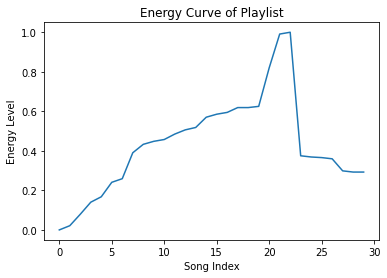

In [38]:
plt.xlabel('Song Index')
plt.ylabel('Energy Level')
plt.title('Energy Curve of Playlist')
plt.plot(tracks['energy'])

In [ ]:
# TODO: rescale values at the end
# TODO: order the sort sections better